## 9. Analyze the peakTree output

Let's have a look how to analyze an interpret a time-height slice of multipeak data.

The observations for the case study were taken at Hyytiälä, Finnland (61.844°N, 24.287°E) on 14 January 2024.


#### Resources
- [pyLARDA](https://github.com/lacros-tropos/larda)
- [pyLARDA documentation](https://lacros-tropos.github.io/larda-doc/html/index.html)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import os
import numpy as np

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

# pyLARDA provides functions for data loading, file joining, analysis and plotting
# https://github.com/lacros-tropos/larda
import pyLARDA
import pyLARDA.peakTree as pLpT
import pyLARDA.helpers as h
import pyLARDA.Transformations as Transf

using peakTree fastbuilder


In [3]:
%matplotlib inline

In [4]:
larda = pyLARDA.LARDA('filepath').connect(c_info={'altitude': 150})

paths = [
    '/home/jupyter-jhcustadmin/peakTree/output/20240114_0700_Hyy_peakTree.nc4',
    '/home/jupyter-jhcustadmin/peakTree/output/20240114_0800_Hyy_peakTree.nc4',
]

# either specify a time interval 
time_int = [datetime.datetime(2024,1,14,7,45),
            datetime.datetime(2024,1,14,9)]
# or if given empty the whole period in the files will be plotted
# time_int = []
# TODO ^ not working at the moment -------------------------------------------------------------------

trees = larda.read("peakTree", "tree", time_int, [0, 5300],paths=paths)

savepath = 'plots/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

>> LARDA initialized. Documentation available at https://lacros-tropos.github.io/larda-doc/
campaign list: 
/opt/tljh/user/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


[slice(np.int64(843), None, None)]
(279, 204, 15, 11)
[slice(np.int64(0), None, None)]
(1118, 204, 15, 11)
['time', 'range', 'dict'] ['time', 'range', 'dict']
(279, 204) (1118, 204)


In [5]:
print('type(trees): ', type(trees))

print('trees.keys() ', trees.keys())

type(trees):  <class 'dict'>
trees.keys()  dict_keys(['dimlabel', 'joints', 'filename', 'paraminfo', 'rg_unit', 'colormap', 'var_unit', 'var_lims', 'system', 'name', 'rg', 'ts', 'var', 'mask'])


In [6]:
trees['var'][100,30]

{0: {'thres': -59.39188003540039,
  'width': 0.3975311815738678,
  'z': -3.356423854827881,
  'bounds': [422, 513],
  'skew': 2.1835947036743164,
  'prominence': 46.87718963623047,
  'v': -1.2586753368377686,
  'id': 0,
  'ldr': -26.778696060180664,
  'ldrmax': -29.184051513671875,
  'coords': [0]},
 1: {'parent_id': 0.0,
  'thres': -50.365623474121094,
  'width': 0.10069946199655533,
  'z': -3.877288341522217,
  'bounds': [422, 479],
  'skew': -1.562708854675293,
  'prominence': 37.85093307495117,
  'v': -1.3960566520690918,
  'id': 1,
  'ldr': -26.69536018371582,
  'ldrmax': -29.184051513671875,
  'coords': [0, 0]},
 2: {'parent_id': 0.0,
  'thres': -50.365623474121094,
  'width': 0.09115927666425705,
  'z': -12.824104309082031,
  'bounds': [479, 513],
  'skew': -0.4361453056335449,
  'prominence': 27.716575622558594,
  'v': -0.18072500824928284,
  'id': 2,
  'ldr': -27.78251075744629,
  'ldrmax': -29.25310516357422,
  'coords': [0, 1]},
 3: {'parent_id': 1.0,
  'thres': -28.94809341

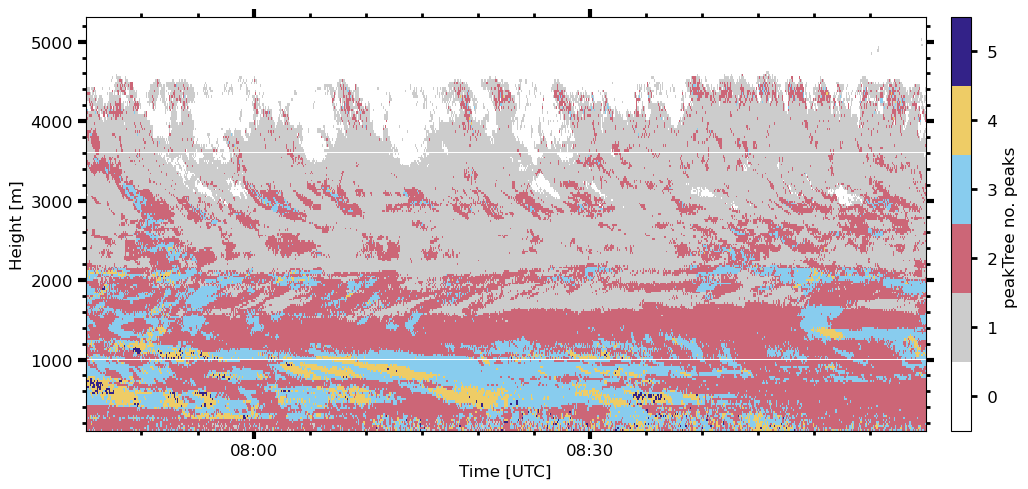

In [7]:
# the tree_to_timeheight selects a 2d array from the ['time', 'range', 'dict'] tree data container
# here just the total number of nodes is returned
# (see https://lacros-tropos.github.io/larda-doc/html/peakTree.html#pyLARDA.peakTree.tree_to_timeheight)
no_nodes = pLpT.tree_to_timeheight(trees, 'no_nodes')
no_nodes['name'] = 'no. nodes'
no_nodes['var_unit'] = ''
fig, ax = pLpT.plot_no_nodes(no_nodes, figsize=[11, 5], no_peaks=True)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=30))
# ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=30))
# ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# fig.savefig(savepath + "{}_no_nodes.png".format(time_int[0].strftime("%Y%m%d-%H%M")), dpi=250)

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5207/3810946878.py:14: SyntaxWarning: invalid escape sequence '\m'
  v['var_unit'] = 'm s$^\mathrm{-1}$'


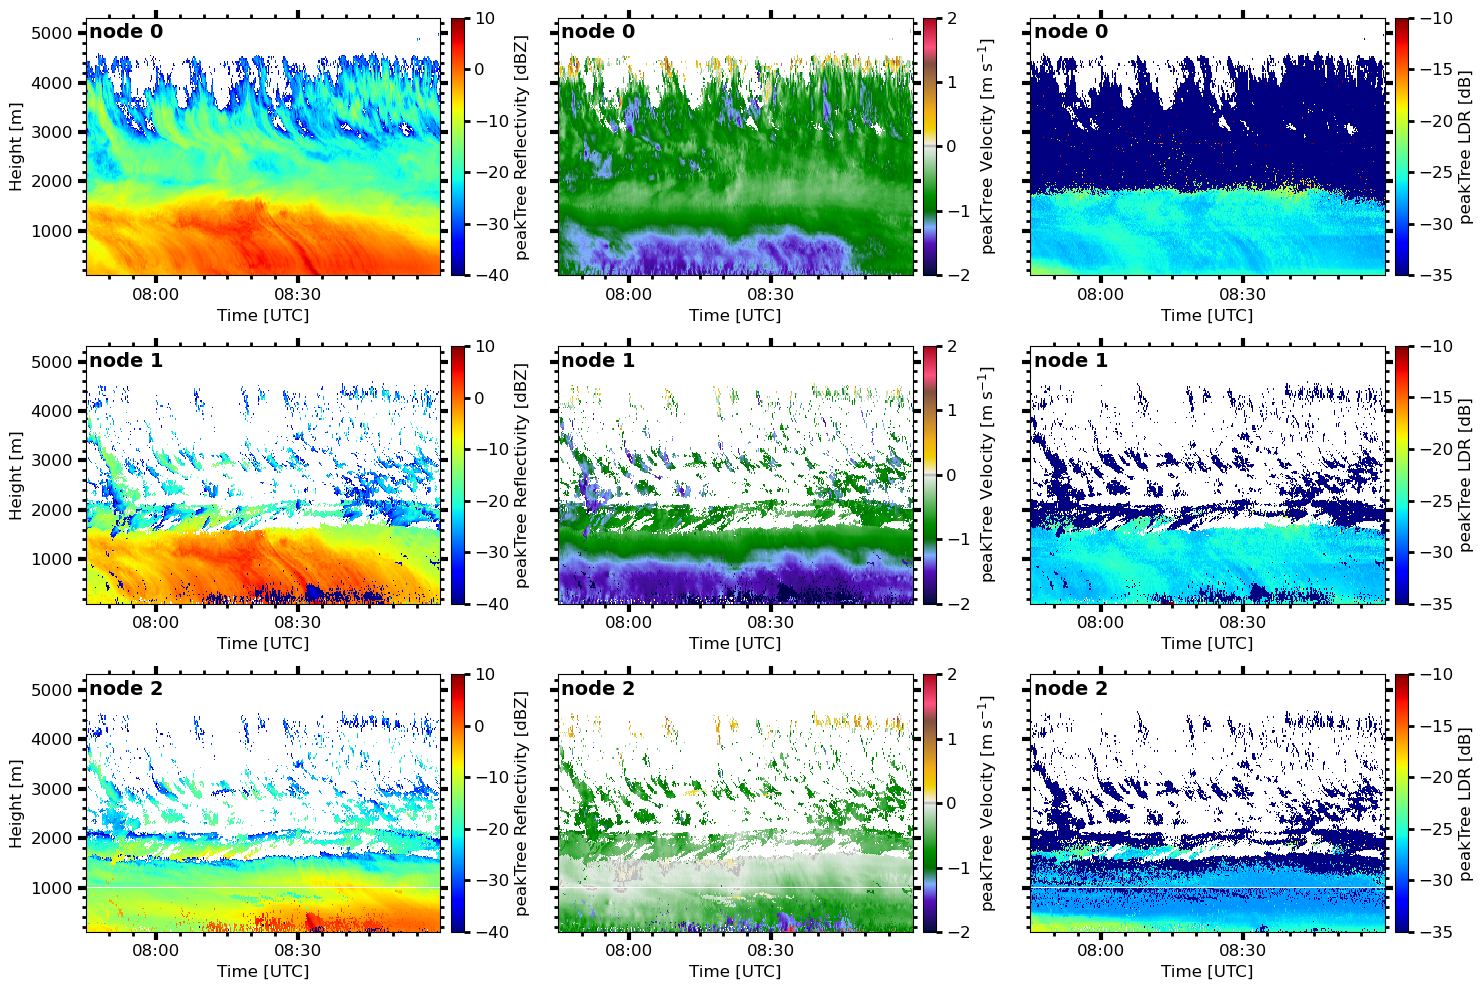

In [8]:
no_nodes_to_plot = 2
fig, ax = plt.subplots(no_nodes_to_plot+1,3, figsize=(15,5*no_nodes_to_plot))
for i in range(0,no_nodes_to_plot+1):
    # do the same selection as above, but for the reflectivity of node i
    z = pLpT.tree_to_timeheight(trees, 'z', sel_node=i)
    z['name'] = 'Reflectivity'
    z['var_unit'] = 'dBZ'
    z['var_lims'] = [-40, 10]
    fig, ax[i,0] = Transf.plot_timeheight2(z, figure=fig, axis=ax[i,0])
    ax[i,0].text(0.01,0.92, f"node {i}", transform=ax[i,0].transAxes, fontweight='semibold', fontsize=14)

    v = pLpT.tree_to_timeheight(trees, 'v', sel_node=i)
    v['name'] = 'Velocity'
    v['var_unit'] = 'm s$^\mathrm{-1}$'
    v['var_lims'] = [-2, 2]
    v['colormap'] = 'carbonne'
    fig, ax[i,1] = Transf.plot_timeheight2(v, figure=fig, axis=ax[i,1])
    ax[i,1].text(0.01,0.92, f"node {i}", transform=ax[i,1].transAxes, fontweight='semibold', fontsize=14)
    ax[i,1].tick_params(axis='y', labelleft=False)
    ax[i,1].set_ylabel('')

    ldr = pLpT.tree_to_timeheight(trees, 'ldr', sel_node=i)
    ldr['name'] = 'LDR'
    ldr['var_unit'] = 'dB'
    ldr['var_lims'] = [-35, -10]
    fig, ax[i,2] = Transf.plot_timeheight2(ldr, figure=fig, axis=ax[i,2])
    ax[i,2].text(0.01,0.92, f"node {i}", transform=ax[i,2].transAxes, fontweight='semibold', fontsize=14)
    ax[i,2].tick_params(axis='y', labelleft=False)
    ax[i,2].set_ylabel('')
    
fig.tight_layout()

In [38]:
# node_to_delete = np.ones_like(no_nodes['var'])
node_to_delete = np.empty_like(no_nodes['var'])
node_to_delete[:] = np.nan

mask = (pLpT.tree_to_timeheight(trees, 'z', sel_node=1)['var'] < -25) & (pLpT.tree_to_timeheight(trees, 'v', sel_node=1)['var'] < -2.1)
node_to_delete[mask] = 1

new_trees = pLpT.remove_nodes(trees, node_to_delete)



<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_74231/2521425772.py:21: SyntaxWarning: invalid escape sequence '\m'
  v['var_unit'] = 'm s$^\mathrm{-1}$'


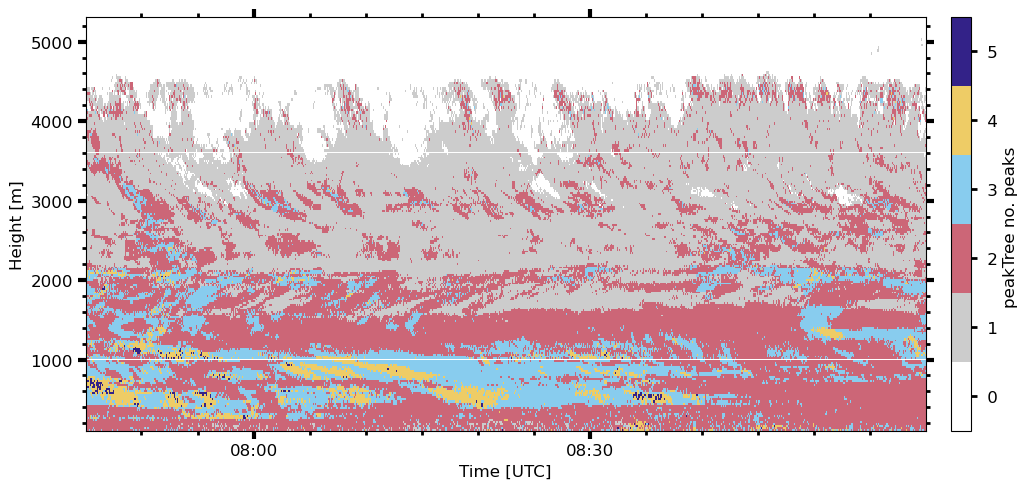

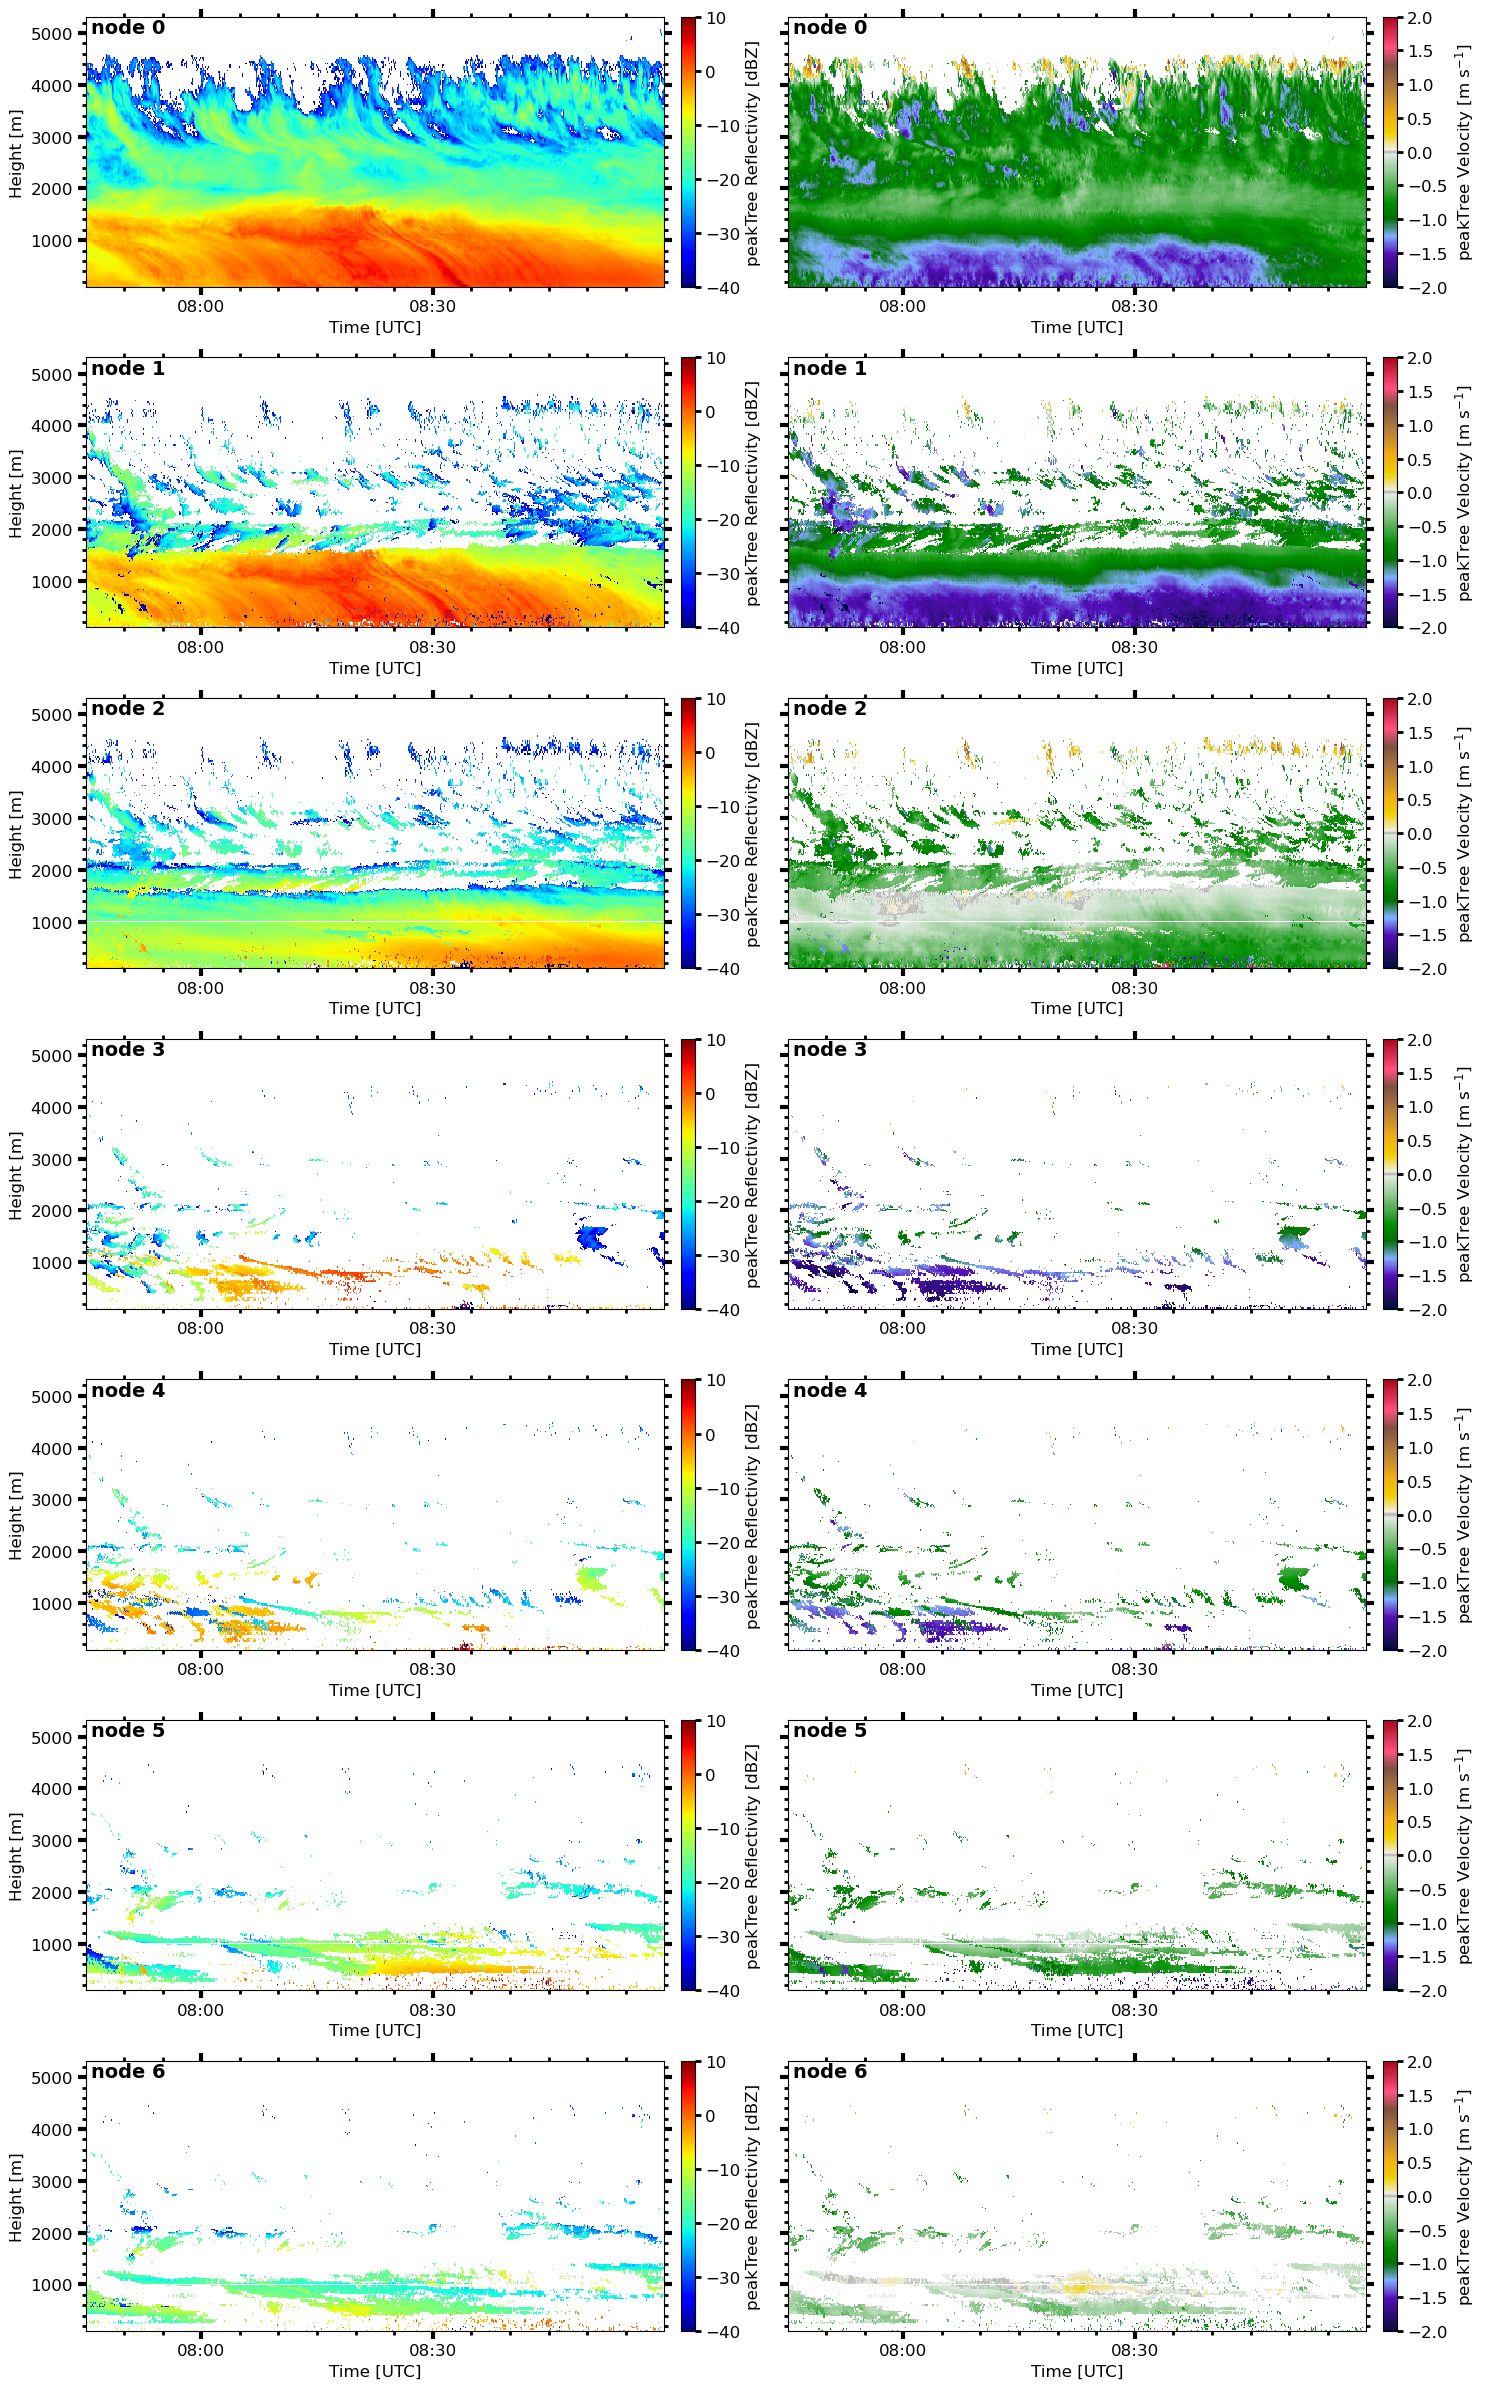

In [39]:
no_nodes = pLpT.tree_to_timeheight(new_trees, 'no_nodes')
no_nodes['name'] = 'no. nodes'
no_nodes['var_unit'] = ''
fig, ax = pLpT.plot_no_nodes(no_nodes, figsize=[11, 5], no_peaks=True)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())


no_nodes_to_plot = 6
fig, ax = plt.subplots(no_nodes_to_plot+1,2, figsize=(15,4*no_nodes_to_plot))
for i in range(0,no_nodes_to_plot+1):
    # do the same selection as above, but for the reflectivity of node i
    z = pLpT.tree_to_timeheight(new_trees, 'z', sel_node=i)
    z['name'] = 'Reflectivity'
    z['var_unit'] = 'dBZ'
    z['var_lims'] = [-40, 10]
    fig, ax[i,0] = Transf.plot_timeheight2(z, figure=fig, axis=ax[i,0])
    ax[i,0].text(0.01,0.94, f"node {i}", transform=ax[i,0].transAxes, fontweight='semibold', fontsize=14)

    v = pLpT.tree_to_timeheight(new_trees, 'v', sel_node=i)
    v['name'] = 'Velocity'
    v['var_unit'] = 'm s$^\mathrm{-1}$'
    v['var_lims'] = [-2, 2]
    v['colormap'] = 'carbonne'
    fig, ax[i,1] = Transf.plot_timeheight2(v, figure=fig, axis=ax[i,1])
    ax[i,1].text(0.01,0.94, f"node {i}", transform=ax[i,1].transAxes, fontweight='semibold', fontsize=14)
    ax[i,1].tick_params(axis='y', labelleft=False)
    ax[i,1].set_ylabel('')
fig.tight_layout()


In [40]:
trees = new_trees

[-1  6 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  6 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


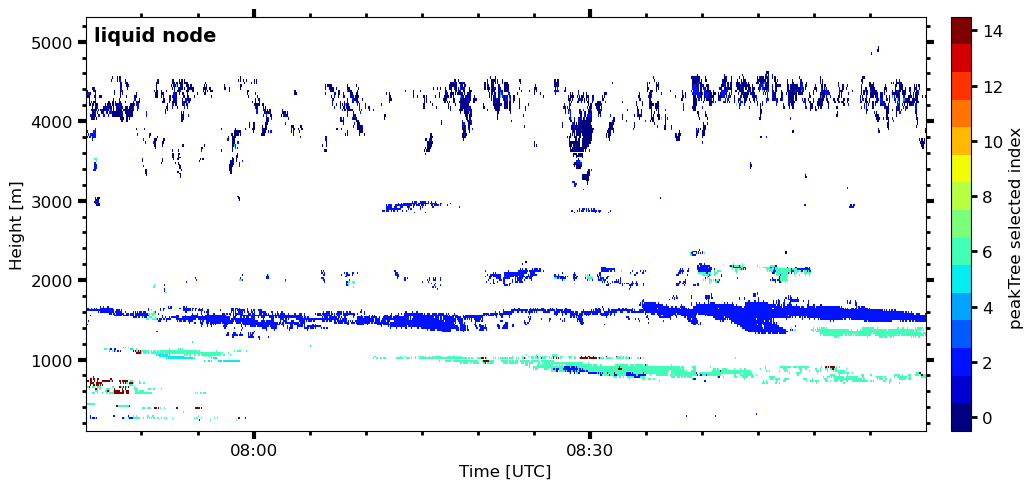

In [41]:
# now we will start to select nodes with special selection rules
# a rather simple one is to identify nodes that are likely liquid
# based on the moments of each node
# (see https://lacros-tropos.github.io/larda-doc/html/_modules/pyLARDA/peakTree.html#select_liquid_node)

liquid_index = pLpT.select_liquid_node(trees, LDR_thresh=-20, Z_thresh=-20)

print(liquid_index['var'][100,10:])

# see https://lacros-tropos.github.io/larda-doc/html/peakTree.html#pyLARDA.peakTree.plot_sel_index
fig, ax = pLpT.plot_sel_index(liquid_index, figsize=[11, 5])
ax.text(0.01,0.94, f"liquid node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_selected_liq_node.png", dpi=250) 



<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_74231/466134162.py:13: SyntaxWarning: invalid escape sequence '\m'
  v_liquid['var_unit'] = 'm s$^\mathrm{-1}$'


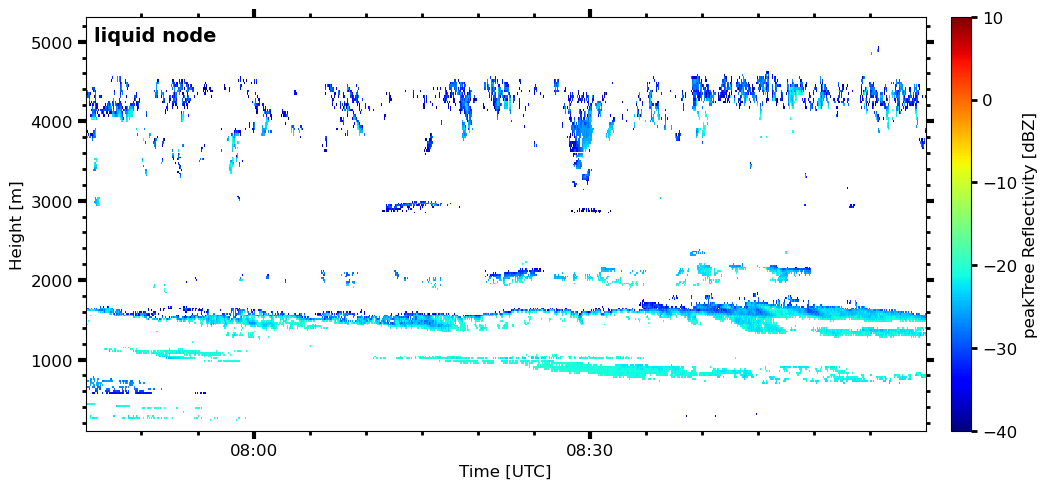

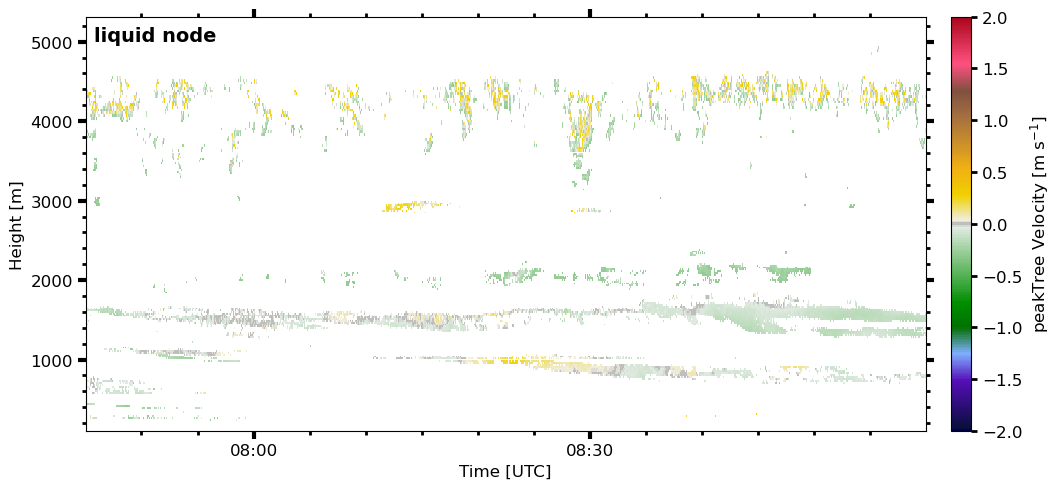

In [42]:
z_liquid = pLpT.tree_to_timeheight(trees, 'z', sel_node=liquid_index['var'])
z_liquid['name'] = 'Reflectivity'
z_liquid['var_unit'] = 'dBZ'
z_liquid['var_lims'] = [-40, 10]
fig, ax = Transf.plot_timeheight2(z_liquid, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"liquid node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_reflectivity_liq_node.png", dpi=250)    


v_liquid = pLpT.tree_to_timeheight(trees, 'v', sel_node=liquid_index['var'])
v_liquid['name'] = 'Velocity'
v_liquid['var_unit'] = 'm s$^\mathrm{-1}$'
v_liquid['var_lims'] = [-2, 2]
v_liquid['colormap'] = 'carbonne'
fig, ax = Transf.plot_timeheight2(v_liquid, figsize=[11, 5])
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.text(0.01,0.94, f"liquid node", transform=ax.transAxes, fontweight='semibold', fontsize=14)
fig.savefig(savepath + f"{time_int[0].strftime('%Y%m%d-%H%M')}_velocity_liq_node.png", dpi=250)    


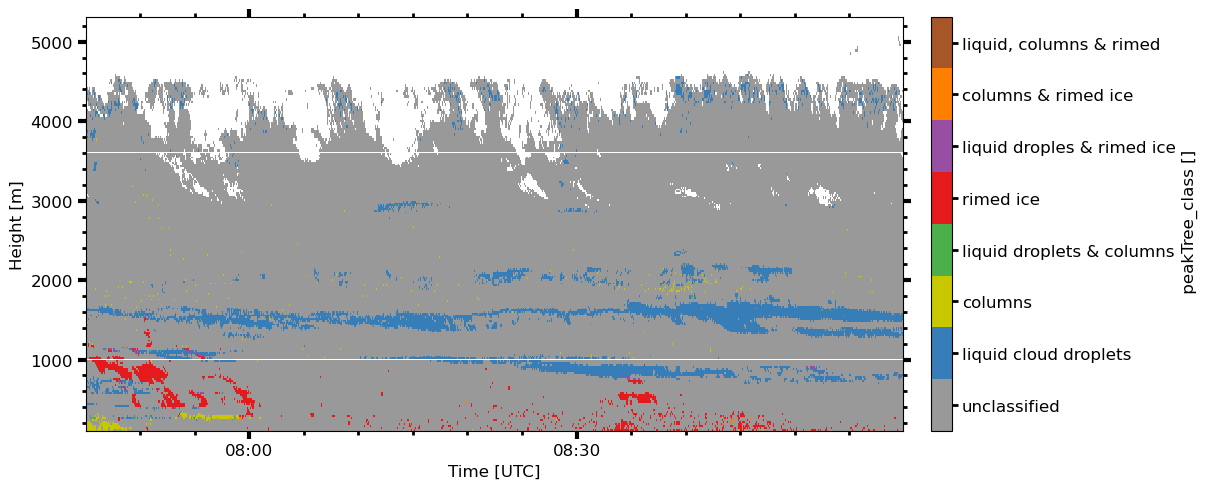

In [43]:
columnar_index = pLpT.select_columnar_ice(trees, LDR_thresh=-20, Z_thresh=5)
rimed_index = pLpT.select_rimed_node(trees)
liquid_mask = liquid_index['var'] > 0
rimed_mask = rimed_index['var'] > 0
column_mask = (columnar_index['var'] > 0)


paths = [
    '/srv/data/shareddata/hyytiala/20240114_hyytiala_classification.nc'
]
cloudnet = larda.read("CLOUDNET", "CLASS", time_int, [0, 5300],paths=paths)

cloudnet_interpolated = pyLARDA.Transformations.interpolate2d(cloudnet, new_time=trees['ts'],  new_range=trees['rg'], method='nearest')
# temperature = larda.read("CLOUDNETpy94", "T", [plot_datetime, plot_datetime + datetime.timedelta(hours=23.9999)], [0, 8001])

hydrometeor_mask = np.zeros(liquid_mask.shape)
hydrometeor_mask[liquid_mask] += 1
hydrometeor_mask[column_mask] += 2
hydrometeor_mask[rimed_mask] += 4
hydrometeor_mask[no_nodes['var'] == 0.] = np.nan
hydrometeor_mask[~((cloudnet_interpolated['var'] == 4) | (cloudnet_interpolated['var'] ==5))] = np.nan # 4,5 = ice/ ice and liquid: Ice + mixed-phase part
container = {'name': "peakTree_class", "colormap": "peakTree_classes", 'var':hydrometeor_mask,
                 'dimlabel':['time', 'range'], 'ts': trees['ts'], 'rg': trees['rg'],
                 'rg_unit': "m", 'mask': np.isnan(hydrometeor_mask), 'var_unit': "",
                 'system': '', 'var_lims': [0,9]}

fig, ax = Transf.plot_timeheight2(container, figsize=[11, 5])